# Data Exploration on Synthetic Data


In [1]:
# data manipulation
import pandas as pd
from datetime import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load file
FILE_DIR = "../data/processed/patient_info.csv"
df = pd.read_csv(FILE_DIR)
df.head()

,Race,Ethnicity,Gender,Age,Birth Date,Marital Status
0,White,Non-Hispanic,F,41.0,1983-09-10,M
1,White,Non-Hispanic,F,58.0,1966-09-17,M
2,White,Non-Hispanic,M,NaN,1957-06-28,D
3,White,Non-Hispanic,M,19.0,2005-04-27,S
4,Asian,Non-Hispanic,F,27.0,1997-10-13,S


## US Census Data for Reference

Data from [US Census QuickFacts](https://www.census.gov/quickfacts/fact/table/US#), version July 1, 2023

In [44]:
census_data = {
    "Population Estimates": {
        "July 1, 2023": 334914895,
        "April 1, 2020 (Census base)": 331464948,
        "Percent Change (April 1, 2020 - July 1, 2023)": 1.0
    },
    "Age": {
        "Persons under 5 years": 5.5,
        "Persons under 18 years": 21.7,
        "Persons 65 years and over": 17.7
    },
    "Sex": {
        "Female (%)": 50.5,
        "Male (%)": 100-50.5
    },
    "Race": {
        "White": 75.3,
        "Black or African American": 13.7,
        "American Indian and \nAlaska Native": 1.3,
        "Asian": 6.4,
        "Native Hawaiian and \nOther Pacific Islander": 0.3
    },
    "Ethnicity": {
        "Non Hispanic": 100-19.5,
        "Hispanic or Latino (%)": 19.5
    }
}

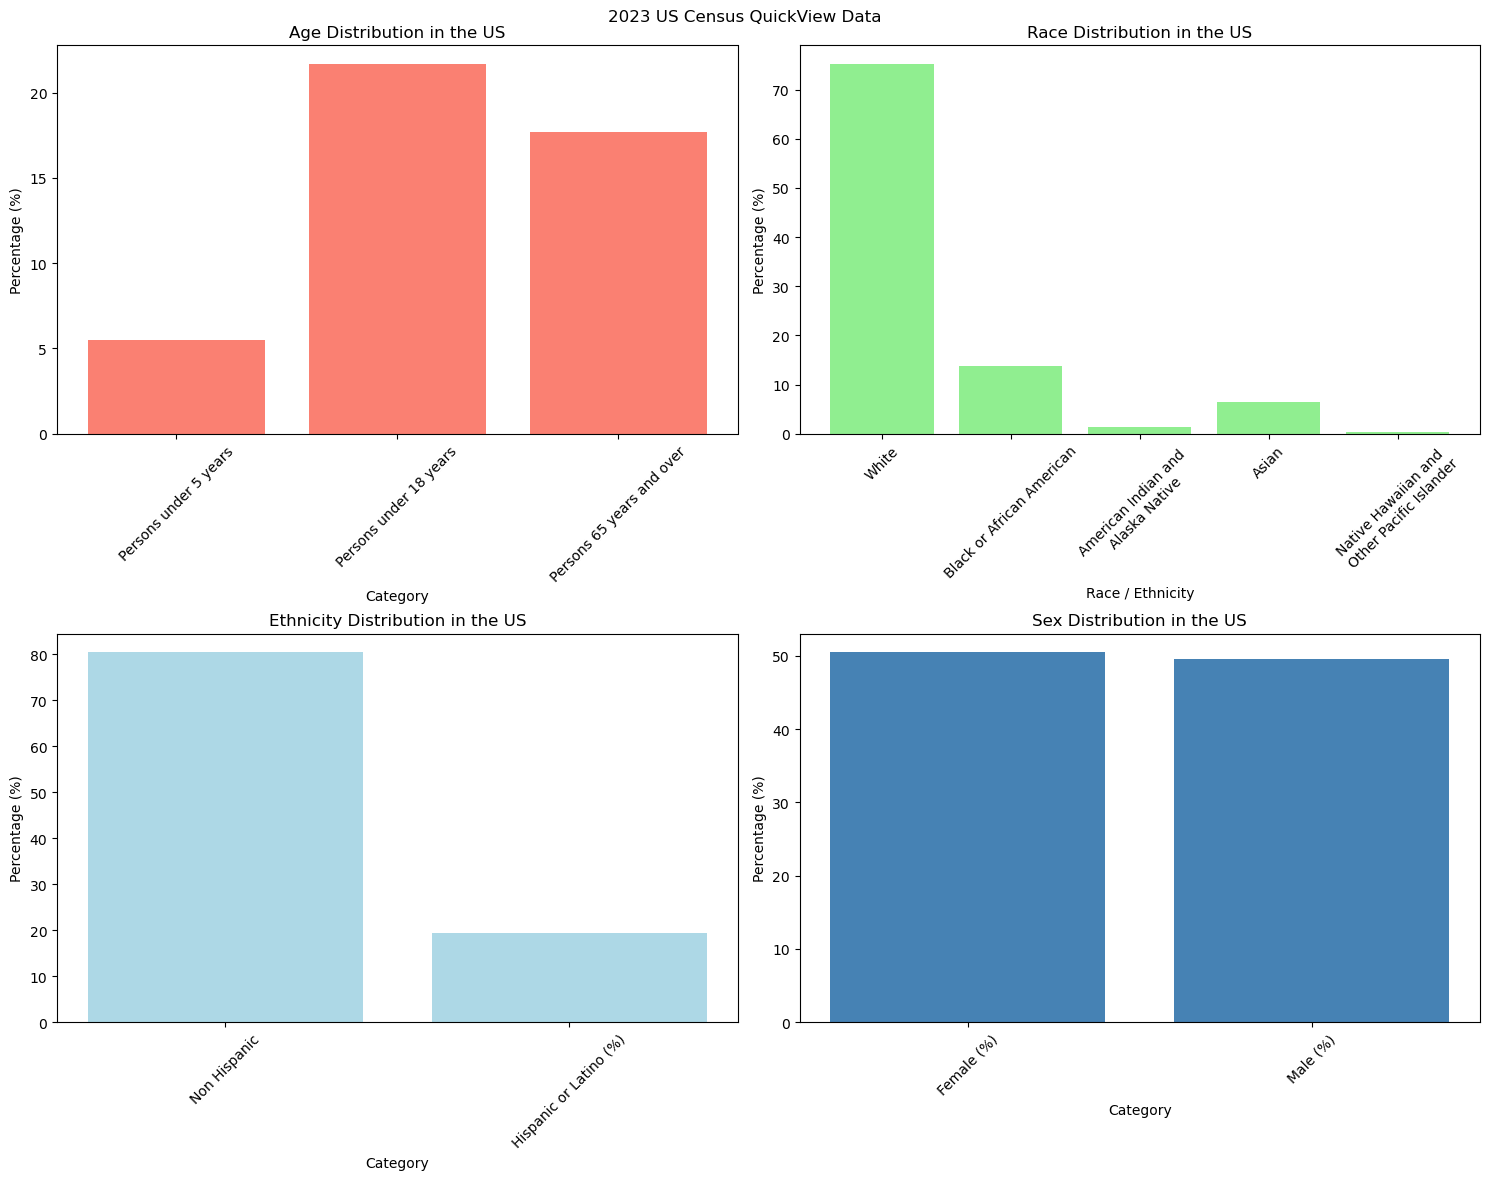

In [68]:
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Plot Age Distribution
age_categories = list(census_data["Age"].keys())
age_values = list(census_data["Age"].values())
axs[0, 0].bar(age_categories, age_values, color="salmon")
axs[0, 0].set_title("Age Distribution in the US")
axs[0, 0].set_xlabel("Category")
axs[0, 0].set_ylabel("Percentage (%)")
axs[0, 0].tick_params(axis='x', rotation=45)

# Plot Race Distribution
race_categories = list(census_data["Race"].keys())
race_values = list(census_data["Race"].values())
axs[0, 1].bar(race_categories, race_values, color="lightgreen")
axs[0, 1].set_title("Race Distribution in the US")
axs[0, 1].set_xlabel("Race / Ethnicity")
axs[0, 1].set_ylabel("Percentage (%)")
axs[0, 1].tick_params(axis='x', rotation=45)

# Plot Ethnicity Distribution
eth_categories = list(census_data["Ethnicity"].keys())
eth_values = list(census_data["Ethnicity"].values())
axs[1, 0].bar(eth_categories, eth_values, color="lightblue")
axs[1, 0].set_title("Ethnicity Distribution in the US")
axs[1, 0].set_xlabel("Category")
axs[1, 0].set_ylabel("Percentage (%)")
axs[1, 0].tick_params(axis='x', rotation=45)

# Plot Sex Distribution
sex_categories = list(census_data["Sex"].keys())
sex_values = list(census_data["Sex"].values())
axs[1, 1].bar(sex_categories, sex_values, color="steelblue")
axs[1, 1].set_title("Sex Distribution in the US")
axs[1, 1].set_xlabel("Category")
axs[1, 1].set_ylabel("Percentage (%)")
axs[1, 1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.suptitle("2023 US Census QuickView Data")
fig.subplots_adjust(top=0.95)
plt.show()


## Version I: Nov 14

Generated 1000 virtual patients: `./run_synthea -p 1000`

### Distributions

/Users/cynthia/anaconda3/envs/bis568/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


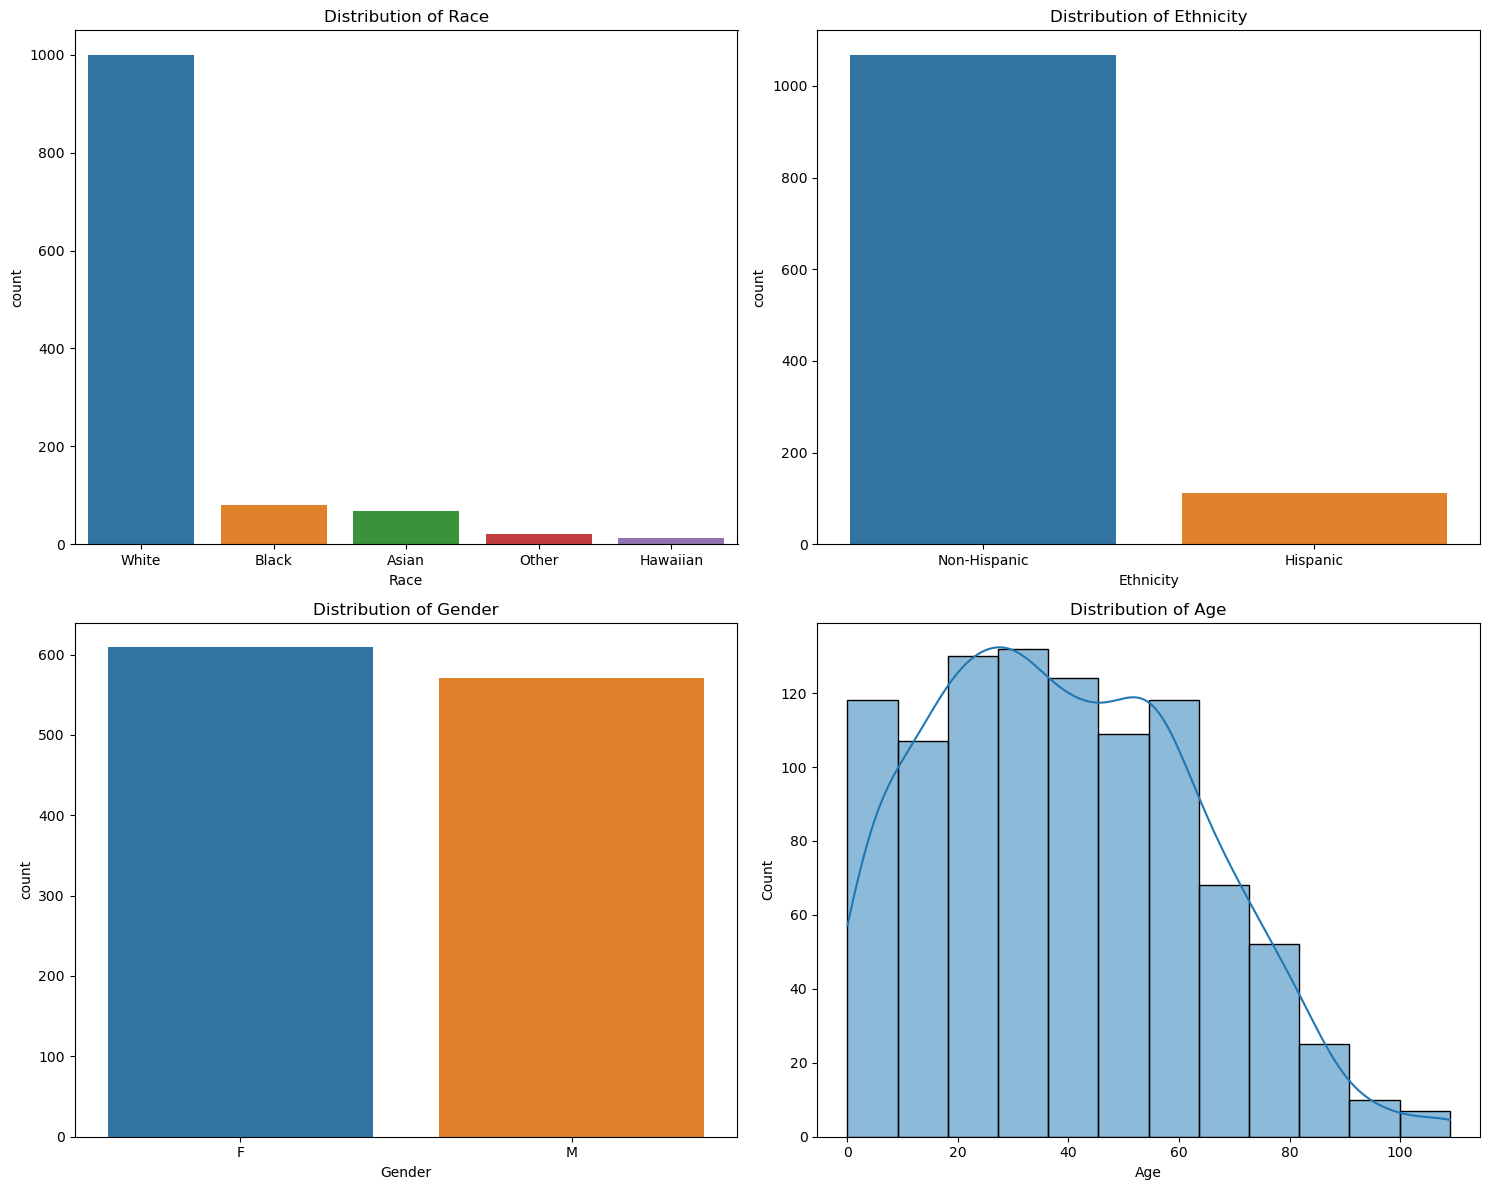

In [3]:
# Create a 2x2 canvas with specific figure size
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Plot the first chart: Distribution of Race
sns.countplot(data=df, x='Race', order=df['Race'].value_counts().index, ax=axs[0, 0])
axs[0, 0].set_title("Distribution of Race")

# Plot the second chart: Distribution of Ethnicity
sns.countplot(data=df, x='Ethnicity', ax=axs[0, 1])
axs[0, 1].set_title("Distribution of Ethnicity")

# Plot the third chart: Distribution of Gender
sns.countplot(data=df, x='Gender', ax=axs[1, 0])
axs[1, 0].set_title("Distribution of Gender")

# Plot the fourth chart: Distribution of Age
sns.histplot(df['Age'], bins=12, kde=True, ax=axs[1, 1])
axs[1, 1].set_title("Distribution of Age")

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


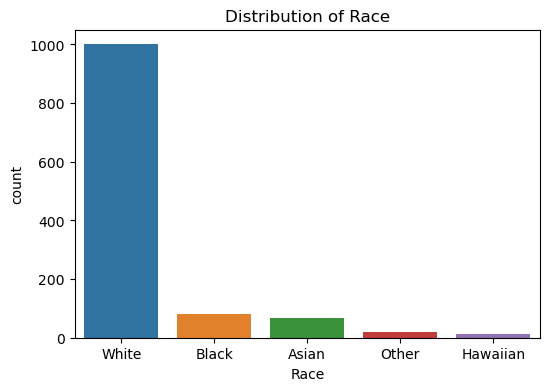

In [54]:
# race
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Race', order=df['Race'].value_counts().index)
plt.title("Distribution of Race")
plt.show()

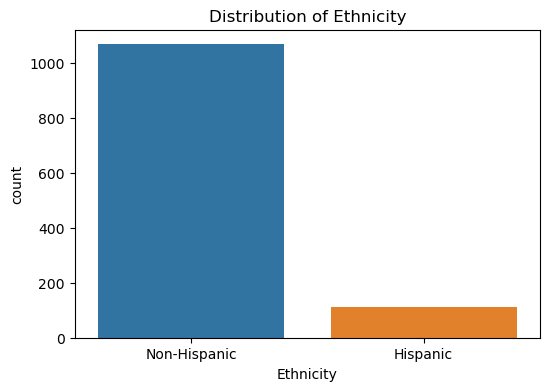

In [4]:
# ethnicity
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Ethnicity')
plt.title("Distribution of Ethnicity")
plt.show()

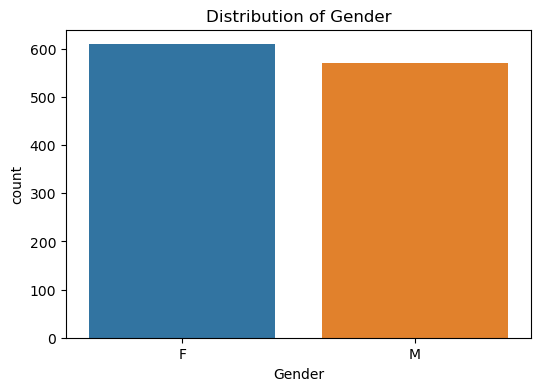

In [6]:
# gender
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender')
plt.title("Distribution of Gender")
plt.show()

In [11]:
# fill NaN in age with (2024 - year(birth date))
df['Birth Date'] = pd.to_datetime(df['Birth Date'], errors='coerce')
current_year = 2024
df['Calculated Age'] = current_year - df['Birth Date'].dt.year
df['Age'] = df['Age'].fillna(df['Calculated Age'])
df = df.drop(columns=['Calculated Age'])
df.head()

,Race,Ethnicity,Gender,Age,Birth Date,Marital Status
0,White,Non-Hispanic,F,41.0,1983-09-10,M
1,White,Non-Hispanic,F,58.0,1966-09-17,M
2,White,Non-Hispanic,M,67.0,1957-06-28,D
3,White,Non-Hispanic,M,19.0,2005-04-27,S
4,Asian,Non-Hispanic,F,27.0,1997-10-13,S


/Users/cynthia/anaconda3/envs/bis568/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


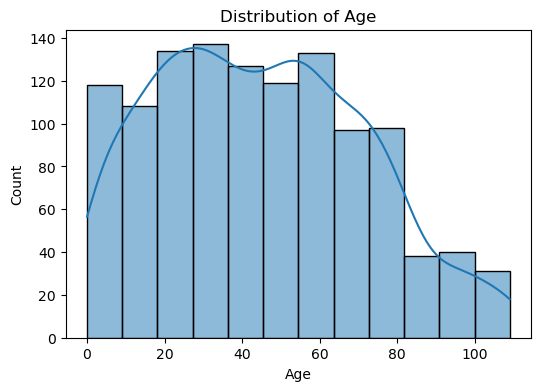

In [14]:
# age
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], bins=12, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.show()

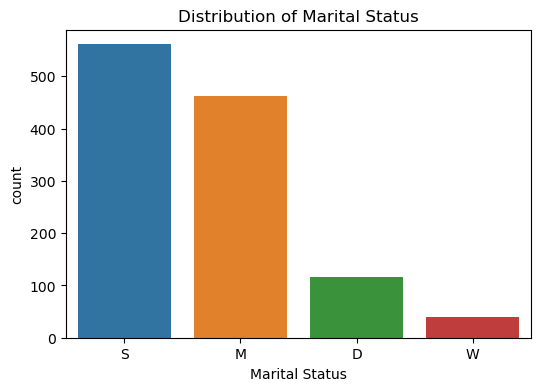

In [53]:
# marital status: {S: single, M: marriage, D: divorced, W: widowed}
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Marital Status', order=df['Marital Status'].value_counts().index)
plt.title("Distribution of Marital Status")
plt.show()